In [7]:
import numpy as np
import matplotlib.pyplot as plt

data points:  25


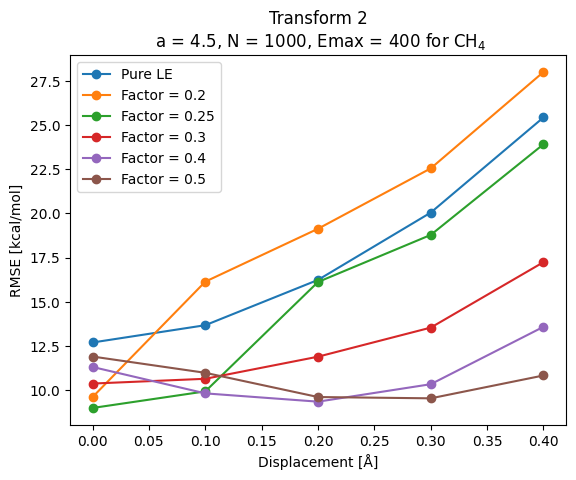

data points:  25


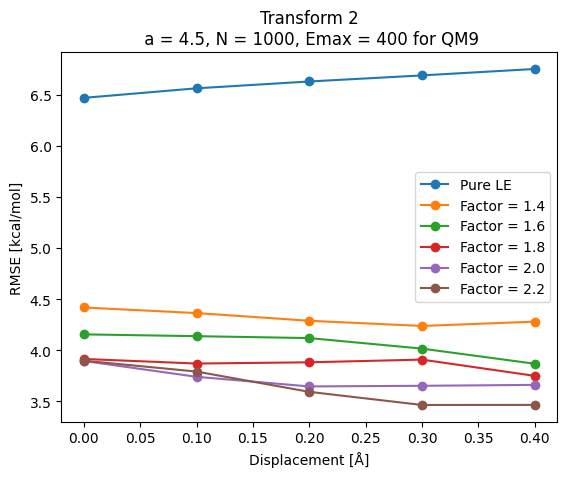

data points:  20


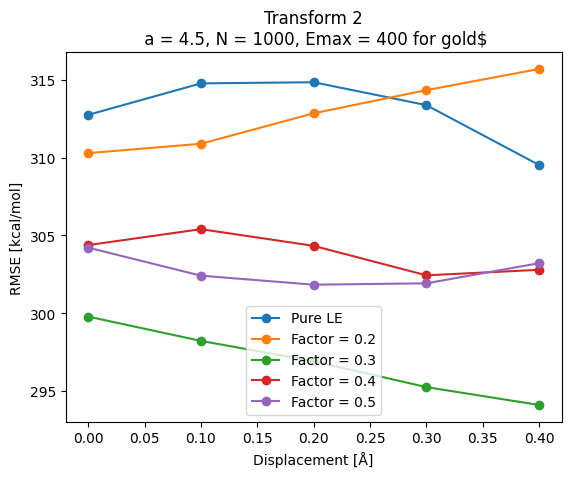

data points:  25


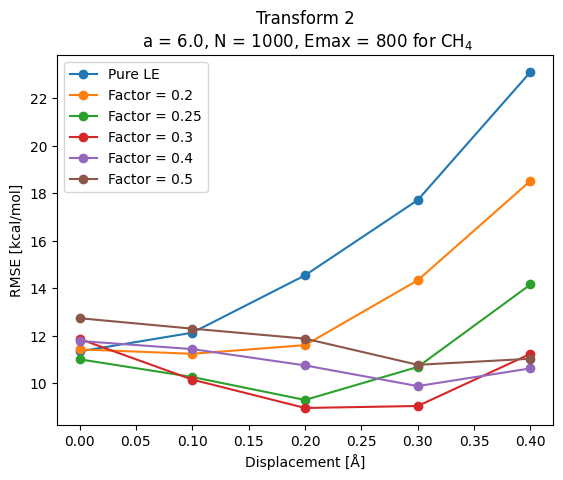

data points:  25


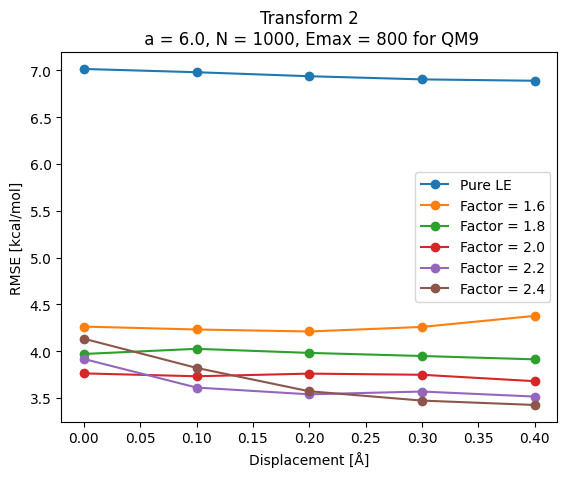

data points:  25


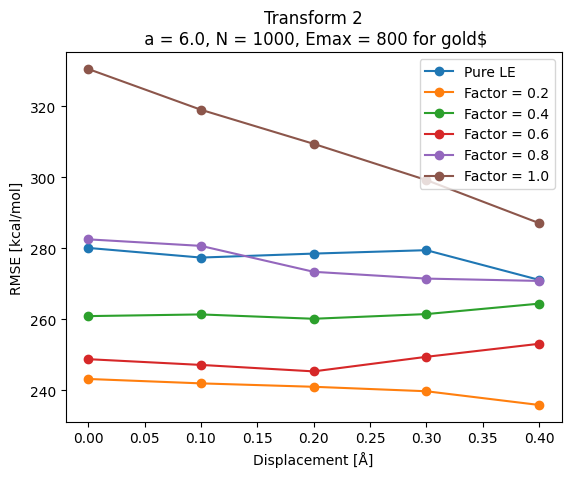

data points:  25


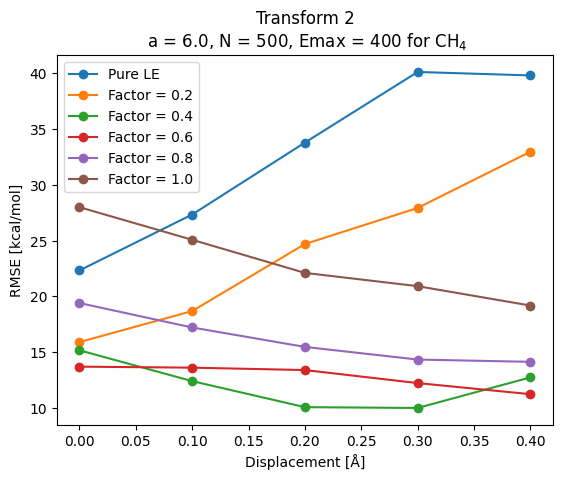

data points:  25


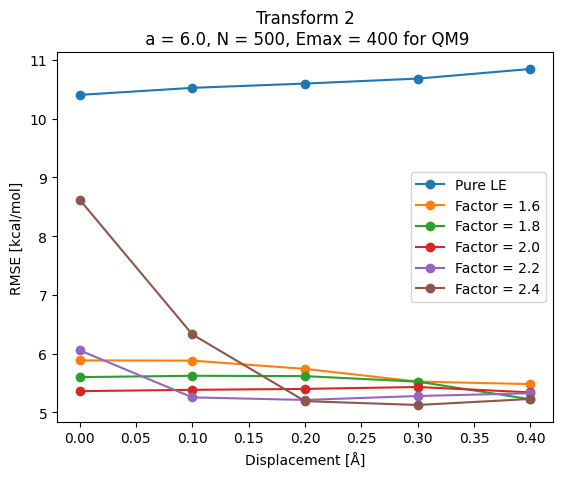

data points:  25


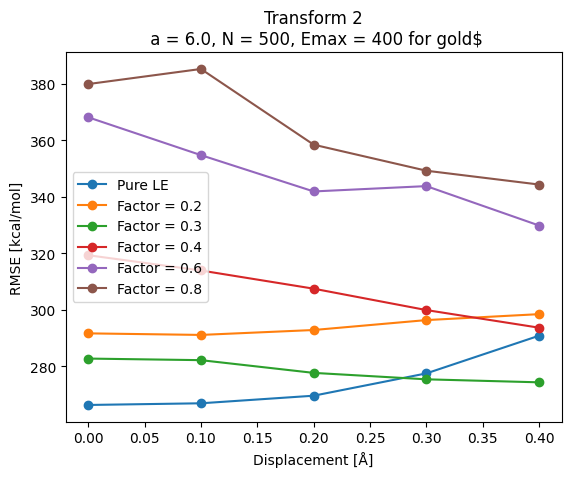

data points:  25


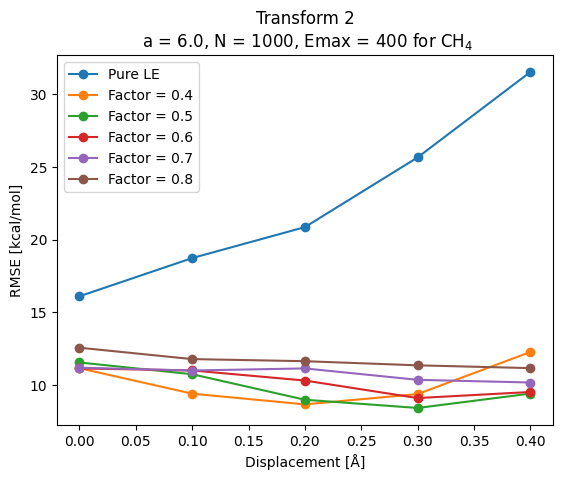

data points:  25


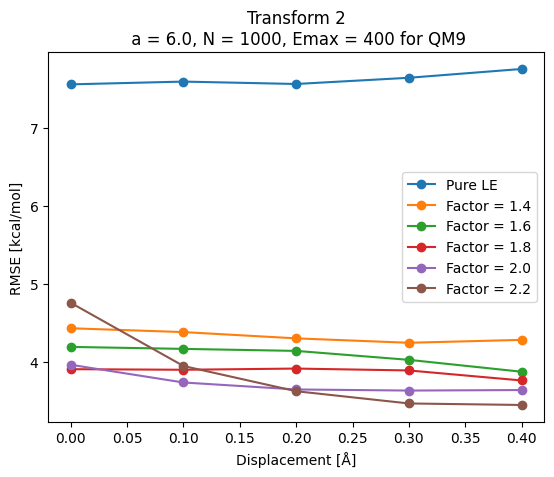

data points:  20


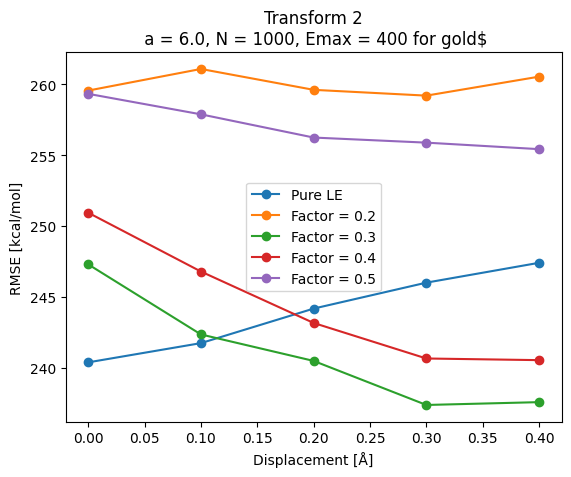

data points:  25


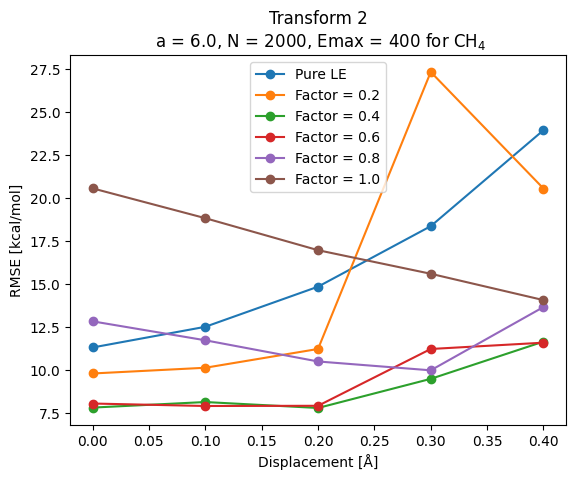

data points:  25


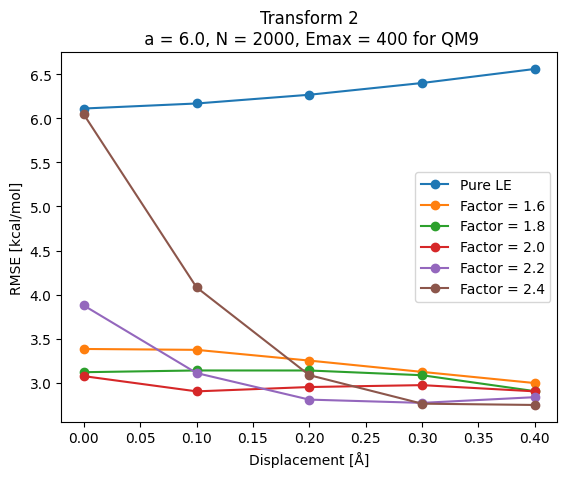

data points:  25


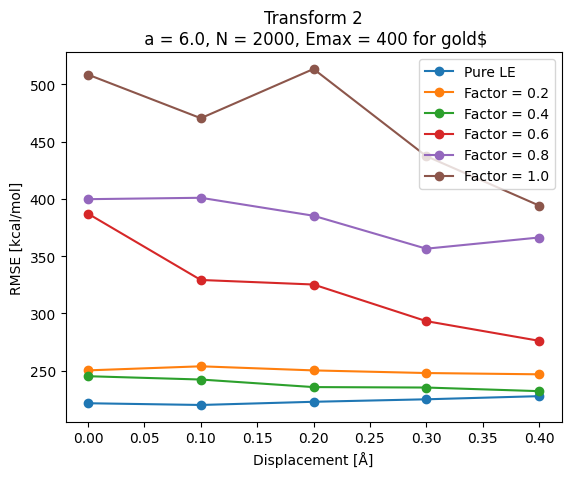

In [8]:
### This notebook compares shifted versions of transform 2 with (shifted) Pure LE

no_of_tr = 8
transforms = [2]
parameters = [[4.5,1000,400],[6.0,1000,800],[6.0,500,400],[6.0,1000,400],[6.0,2000,400]] # first: a, second: N, third: Emax
Reference_Path = '/home/ach/radial-physics_new/radial-physics/output/TR2_rscal_shift/TR_0' 

for param in parameters:

    #QM9
    label_qm9_ref = []
    rmse_qm9_ref = []
    displacement_qm9_ref = []
    data_qm9_ref = open(Reference_Path+f'/Data_TR0_qm9_{param[0]}_{param[2]}_{param[1]}','r')
    #Gold
    label_gold_ref = []
    rmse_gold_ref = []
    displacement_gold_ref = []
    data_gold_ref = open(Reference_Path+f'/Data_TR0_gold_{param[0]}_{param[2]}_{param[1]}','r')
    #Methane
    label_ch4_ref = []
    rmse_ch4_ref = []
    displacement_ch4_ref = []
    data_ch4_ref = open(Reference_Path+f'/Data_TR0_random-ch4-10k_{param[0]}_{param[2]}_{param[1]}','r')
    for row in data_qm9_ref: #QM9
        row = row.split(' ')
        label_qm9_ref.append((row[0]))
        displacement_qm9_ref.append(float(row[1]))
        rmse_qm9_ref.append(float(row[2]))

    for row in data_gold_ref: #Gold
        row = row.split(' ')
        label_gold_ref.append((row[0]))
        displacement_gold_ref.append(float(row[1]))
        rmse_gold_ref.append(float(row[2]))

    for row in data_ch4_ref: #Methane
        row = row.split(' ')
        label_ch4_ref.append((row[0]))
        displacement_ch4_ref.append(float(row[1]))
        rmse_ch4_ref.append(float(row[2]))

    ch4_dict_ref = dict(zip(displacement_ch4_ref, rmse_ch4_ref)) #print(ch4_dict_ref['4.5_400_1000'])
    gold_dict_ref = dict(zip(displacement_gold_ref, rmse_gold_ref))
    qm9_dict_ref = dict(zip(displacement_qm9_ref, rmse_qm9_ref))
#REF
##################
#TR2

    minimia_all_tr_qm9 = []
    minimia_all_tr_ch4 = []
    minimia_all_tr_gold = []

    for i in transforms: # range(1,no_of_tr+1)
    
        Path = f'/home/ach/radial-physics_new/radial-physics/output/TR2_rscal_shift/TR_{i}'
        #Define/reset lists + open data
        factor_qm9 = [] #QM9
        rmse_qm9 = []
        data_qm9 = open(Path+f'/a_{param[0]}_N_{param[1]}_E_{param[2]}/Data_TR2_qm9','r')
        displacement_qm9 = []

        factor_gold = [] #Gold
        rmse_gold = []
        data_gold = open(Path+f'/a_{param[0]}_N_{param[1]}_E_{param[2]}/Data_TR2_gold','r')
        displacement_gold = []   

        factor_ch4 = [] #Methane
        rmse_ch4 = []
        data_ch4 = open(Path+f'/a_{param[0]}_N_{param[1]}_E_{param[2]}/Data_TR2_random-ch4-10k','r')
        displacement_ch4 = []

        for row in data_ch4: #Methane
            row = row.split(' ')
            factor_ch4.append(float(row[0]))
            displacement_ch4.append(float(row[1]))
            rmse_ch4.append(float(row[2]))
        
        for row in data_gold: #Gold
            row = row.split(' ')
            factor_gold.append(float(row[0]))
            displacement_gold.append(float(row[1]))
            rmse_gold.append(float(row[2]))
        
        for row in data_qm9: #QM9
            row = row.split(' ')
            factor_qm9.append(float(row[0]))
            displacement_qm9.append(float(row[1]))
            rmse_qm9.append(float(row[2]))

        #indices of minima and minima (for plot later)
        minimum_indx_qm9 = np.argmin(rmse_qm9,axis=0)
        minimum_indx_ch4 = np.argmin(rmse_ch4,axis=0)
        minimum_indx_gold = np.argmin(rmse_gold,axis=0)
        
        minimia_all_tr_qm9.append(rmse_qm9[minimum_indx_qm9])
        minimia_all_tr_ch4.append(rmse_ch4[minimum_indx_ch4])
        minimia_all_tr_gold.append(rmse_gold[minimum_indx_gold])


        # fig, ax = plt.subplots()
        # fig.subplots_adjust(right=0.75)

        # twin1 = ax.twinx()
        # twin2 = ax.twinx()

        # # Offset the right spine of twin2.  The ticks and label have already been
        # # placed on the right by twinx above.
        # twin2.spines.right.set_position(("axes", 1.2))
        
        ##METHANE
        no_datapoints = len(displacement_ch4)
        print('data points: ', no_datapoints)
        plt.plot(displacement_ch4_ref, rmse_ch4_ref, "-o", label=f"Pure LE")
        for j in range(int(no_datapoints/5)):
            plt.plot(displacement_ch4[(5*j):(5+5*j)], rmse_ch4[(5*j):(5+5*j)] , "-o", label=f"Factor = {factor_ch4[(5*j)]}")
        plt.title(f"Transform {i}\n a = {param[0]}, N = {param[1]}, Emax = {param[2]} for CH$_4$")
        plt.xlabel("Displacement [Å]")
        plt.ylabel("RMSE [kcal/mol]")
        plt.legend()
        plt.show()

        ##QM9
        no_datapoints = len(displacement_qm9)
        print('data points: ', no_datapoints)
        plt.plot(displacement_qm9_ref, rmse_qm9_ref, "-o", label=f"Pure LE")
        for j in range(int(no_datapoints/5)):
            plt.plot(displacement_qm9[(5*j):(5+5*j)], rmse_qm9[(5*j):(5+5*j)] , "-o", label=f"Factor = {factor_qm9[(5*j)]}")
        plt.title(f"Transform {i}\n a = {param[0]}, N = {param[1]}, Emax = {param[2]} for QM9")
        plt.xlabel("Displacement [Å]")
        plt.ylabel("RMSE [kcal/mol]")
        plt.legend()
        plt.show()

        ##GOLD
        no_datapoints = len(displacement_gold)
        print('data points: ', no_datapoints)
        plt.plot(displacement_gold_ref, rmse_gold_ref, "-o", label=f"Pure LE")
        for j in range(int(no_datapoints/5)):
            plt.plot(displacement_gold[(5*j):(5+5*j)], rmse_gold[(5*j):(5+5*j)] , "-o", label=f"Factor = {factor_gold[(5*j)]}")
        plt.title(f"Transform {i}\n a = {param[0]}, N = {param[1]}, Emax = {param[2]} for gold$")
        plt.xlabel("Displacement [Å]")
        plt.ylabel("RMSE [kcal/mol]")
        plt.legend()
        plt.show()

        # p1, = ax.plot(factor_qm9, rmse_qm9 , "b-o", label="QM9")
        # p2, = twin1.plot(factor_ch4, rmse_ch4, "r-o", label="CH4")
        # p3, = twin2.plot(factor_gold, rmse_gold, "g-o", label="Gold")

        # ax.set_xlim(0, 2)
        # ax.set_ylim(0, 2)
        # twin1.set_ylim(0, 4)
        # twin2.set_ylim(1, 65)

        # ax.set_xlabel("Factor")
        # ax.set_ylabel("QM9 RMSE [kcal/mol]")
        # ax.set_title(f"Transform {i}\n a = {param[0]}, N = {param[1]}, Emax = {param[2]} ")
        # twin1.set_ylabel("CH4 RMSE [kcal/mol]")
        # twin2.set_ylabel("Gold RMSE [kcal/mol]")

        # ax.yaxis.label.set_color(p1.get_color())
        # twin1.yaxis.label.set_color(p2.get_color())
        # twin2.yaxis.label.set_color(p3.get_color())

        # tkw = dict(size=4, width=1.5)
        # ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
        # twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
        # twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
        # ax.tick_params(axis='x', **tkw)


        # # ax.legend(handles=[p1, p2, p3], loc = 'best')
        # # fig.legend(bbox_to_anchor=(1, 1.), ncol=5)
        # ax.axhline(qm9_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'], color='blue', linestyle='solid',linewidth=1)
        # twin1.axhline(ch4_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'], color='red', linestyle='solid',linewidth=1)
        # twin2.axhline(gold_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'], color='green', linestyle='solid',linewidth=1)
        # ax.legend(handles=[p1, p2, p3], loc = 'best')

        # from matplotlib.lines import Line2D
        # line1 = Line2D([0], [0], label='No transform', color='black')
        # fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.8, 1.05), ncol=5,)
        # plt.show()




    ### one plot for each data set with all minima:


#     fig, ax = plt.subplots()
#     fig.subplots_adjust(right=0.75)

#     twin1 = ax.twinx()
#     twin2 = ax.twinx()

#     # Offset the right spine of twin2.  The ticks and label have already been
#     # placed on the right by twinx above.
#     twin2.spines.right.set_position(("axes", 1.2))

    
#     minimia_all_tr_qm9.append(qm9_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'])
#     minimia_all_tr_ch4.append(ch4_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'])
#     minimia_all_tr_gold.append(gold_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'])
#     print("RMSE without scaling, with scaling and without transform (Plot below)")
#     print("QM9: ",minimia_all_tr_qm9)
#     print("CH$_4$: ", minimia_all_tr_ch4)
#     print("Gold: ", minimia_all_tr_gold)

#     transforms = np.append(transforms, ['Pure LE'])
#     p1, = ax.plot(transforms, minimia_all_tr_qm9 , "bo", label="QM9", ls = ':')  #range(1,no_of_tr+1)
#     p2, = twin1.plot(transforms, minimia_all_tr_ch4, "r:o", label="CH4")
#     p3, = twin2.plot(transforms, minimia_all_tr_gold, "g:o", label="Gold")
#     transforms = np.delete(transforms,-1)
#     # ax.set_xlim(0, 2)
#     # ax.set_ylim(0, 2)
#     # twin1.set_ylim(0, 4)
#     # twin2.set_ylim(1, 65)

#     ax.set_xlabel("Transform")
#     ax.set_ylabel("QM9 RMSE [kcal/mol]")
#     ax.set_title(f"Minimum RMSE for both transforms\n a = {param[0]}, N = {param[1]}, Emax = {param[2]}")
#     twin1.set_ylabel("CH4 RMSE [kcal/mol]")
#     twin2.set_ylabel("Gold RMSE [kcal/mol]")

#     # ax.yaxis.label.set_color(p1.get_color())
#     # twin1.yaxis.label.set_color(p2.get_color())
#     # twin2.yaxis.label.set_color(p3.get_color())

#     tkw = dict(size=4, width=1.5)
#     ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
#     twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
#     twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
#     ax.tick_params(axis='x', **tkw)

#     # Add RMSE without transform
#     # ax.axhline(qm9_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'], color='blue', linestyle='solid',linewidth=1)
#     # twin1.axhline(ch4_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'], color='red', linestyle='solid',linewidth=1)
#     # twin2.axhline(gold_dict_ref[f'{param[0]}_{param[2]}_{param[1]}'], color='green', linestyle='solid',linewidth=1)
#     # ax.legend(handles=[p1, p2, p3], loc = 'best')

#     from matplotlib.lines import Line2D
#     line1 = Line2D([0], [0], label='No transform', color='black')
#     fig.legend(handles=[line1, p1, p2, p3], bbox_to_anchor=(0.8, 1.05), ncol=5,)

# ################## RMSE for a, N, emax = [6.0,2000,400] ################## (accidentally deleted directory)
# # RMSE without scaling, with scaling and without transform
# # QM9: [2.6675946712493896, 3.831709384918213, 4.7445220947265625]
# # CH$_4$: [4.93049430847168, 17.565208435058594, 6.964672088623047]
# # Gold: [173.2955780029297, 178.07241821289062, 166.98548889160156]